# Aufgabe 2: Classification

A short test to examine the performance gain when using multiple cores on sklearn's esemble classifier random forest.
Depending on the available system the maximum number of jobs to test and the sample size can be adjusted by changing the respective parameters.

In [1]:
# imports
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
import time
import matplotlib.pyplot as plt

First we create a training set of size num_samples and num_features.

In [2]:
num_samples = 500 * 1000
num_features = 40
X, y = make_classification(n_samples=num_samples, n_features=num_features)

Next we run a performance test on the created data set. Therefor we train a random forest classifier multiple times and and measure the training time. Each time we use a different number of jobs to train the classifier. We repeat the process on training sets of various sizes.

In [3]:
# test different number of cores: here max 8
max_cores = 8
num_cpu_list = list(range(1,max_cores + 1))
max_sample_list = [int(l * num_samples) for l in [0.1, 0.2, 1, 0.001]]
training_times_all = []

In [4]:
# the default setting for classifier
clf = RandomForestClassifier()

for max_sample in max_sample_list:
    training_times = []
    for num_cpu in num_cpu_list:
        # change number of cores
        clf.set_params(n_jobs=num_cpu)
        start_time = time.time()
        # train classifier on training data
        clf.fit(X[:max_sample+1], y[:max_sample+1])
        # save the runtime to the list
        training_times.append(time.time() - start_time)
        # print logging message
        print("Computing for {} samples and {} cores DONE.".format(max_sample,num_cpu))
    
    training_times_all.append(training_times)

print("All computations DONE.")

Computing for 50000 samples and 1 cores DONE.
Computing for 50000 samples and 2 cores DONE.
Computing for 50000 samples and 3 cores DONE.
Computing for 50000 samples and 4 cores DONE.
Computing for 50000 samples and 5 cores DONE.
Computing for 50000 samples and 6 cores DONE.
Computing for 50000 samples and 7 cores DONE.
Computing for 50000 samples and 8 cores DONE.
Computing for 100000 samples and 1 cores DONE.
Computing for 100000 samples and 2 cores DONE.
Computing for 100000 samples and 3 cores DONE.
Computing for 100000 samples and 4 cores DONE.
Computing for 100000 samples and 5 cores DONE.
Computing for 100000 samples and 6 cores DONE.
Computing for 100000 samples and 7 cores DONE.
Computing for 100000 samples and 8 cores DONE.
Computing for 500000 samples and 1 cores DONE.
Computing for 500000 samples and 2 cores DONE.
Computing for 500000 samples and 3 cores DONE.
Computing for 500000 samples and 4 cores DONE.
Computing for 500000 samples and 5 cores DONE.
Computing for 500000 

Finally we plot and evaluate our results.

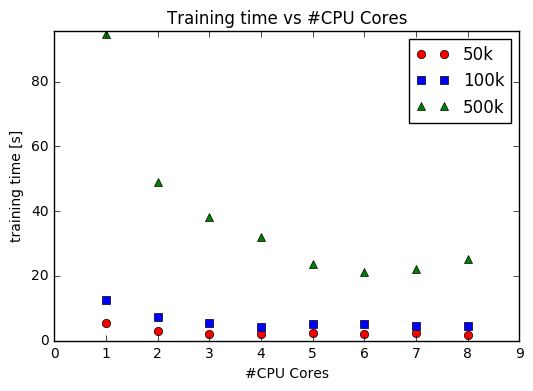

In [5]:
plt.plot(num_cpu_list, training_times_all[0], 'ro', label="{}k".format(max_sample_list[0]//1000))
plt.plot(num_cpu_list, training_times_all[1], "bs" , label="{}k".format(max_sample_list[1]//1000))
plt.plot(num_cpu_list, training_times_all[2], "g^" , label="{}k".format(max_sample_list[2]//1000))
plt.axis([0, len(num_cpu_list)+1, 0, max(training_times_all[2])+1])
plt.title("Training time vs #CPU Cores")
plt.xlabel("#CPU Cores")
plt.ylabel("training time [s]")
plt.legend()
plt.show()

The training time is inversely proportional to the number of used cpu cores.

In [ ]:
plt.plot(num_cpu_list, training_times_all[3], 'ro', label="{}k".format(max_sample_list[3]/1000))
plt.axis([0, len(num_cpu_list)+1, 0, max(training_times_all[3])+1])
plt.title("Training time vs #CPU Cores on small dataset")
plt.xlabel("#CPU Cores")
plt.ylabel("training time [s]")
plt.legend()
plt.show()

However for small datasets the overhead introduced by multiprocessing can be higher than the actual execution time needed for training. In that case using multiple cores (n_jobs > 1) will not lead to decreased execution times.